In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Membaca file Excel
file_path = "Data_Cuaca_Bersih.xlsx"
df = pd.read_excel(file_path)

In [3]:
# Memilih kolom tempmax dan tempmin
data = df[['tempmax', 'tempmin']]

In [4]:
# Scaling menggunakan Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

C:\Users\dwia6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (num_clusters=2): 0.37363226954587125


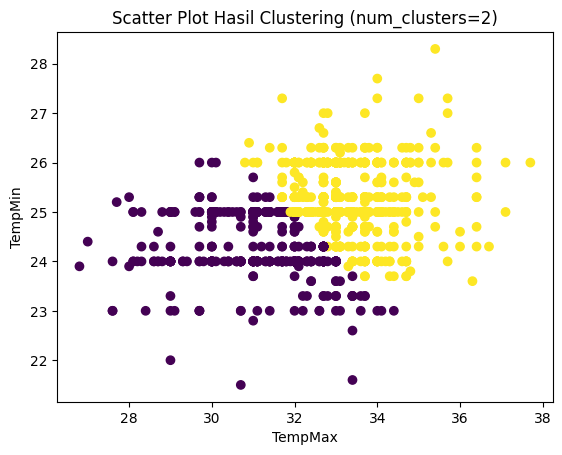

C:\Users\dwia6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (num_clusters=3): 0.3760170075621142


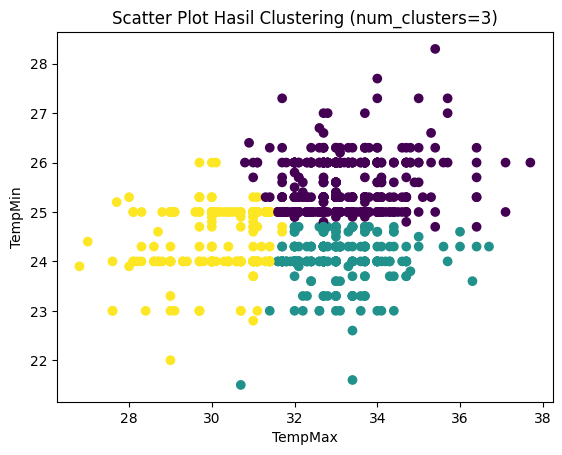

C:\Users\dwia6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (num_clusters=4): 0.35835217804018804


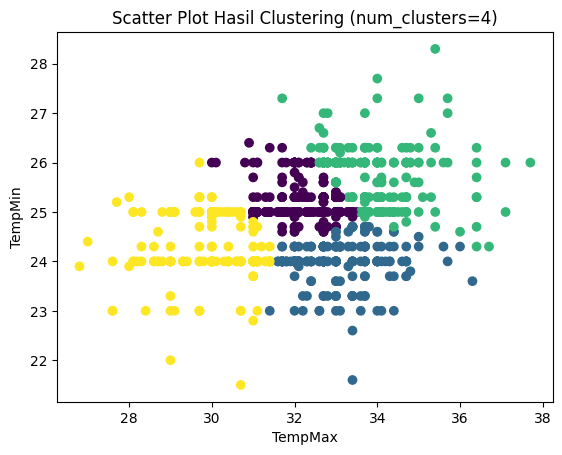

C:\Users\dwia6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (num_clusters=5): 0.3896178137614342


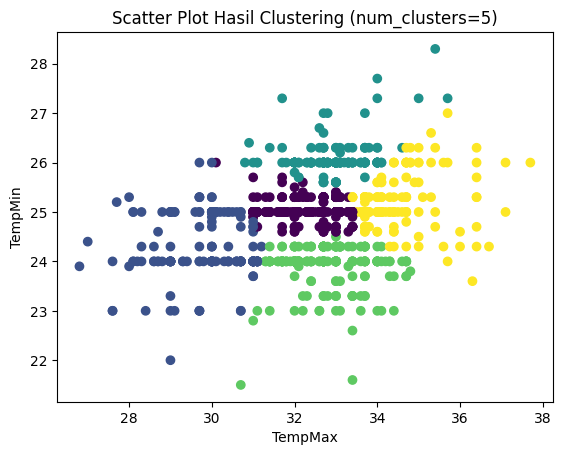

In [5]:
# Loop untuk mencoba nilai num_clusters dari 2 hingga 5
for num_clusters in range(2, 6):
    # Melakukan KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(data_scaled)

    # Menilai performa clustering menggunakan Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, df['cluster'])
    print(f"Silhouette Score (num_clusters={num_clusters}): {silhouette_avg}")

    # Menyimpan hasil clustering ke dalam file Excel
    output_file_path = f"Data_Cuaca_Bersih_Clustered_{num_clusters}.xlsx"
    df.to_excel(output_file_path, index=False)

    # Menampilkan dan menyimpan scatter plot hasil clustering
    plt.scatter(df['tempmax'], df['tempmin'], c=df['cluster'], cmap='viridis')
    plt.title(f'Scatter Plot Hasil Clustering (num_clusters={num_clusters})')
    plt.xlabel('TempMax')
    plt.ylabel('TempMin')
    plt.savefig(f'Scatter_Plot_Clustered_{num_clusters}.png')
    plt.show()